<a href="https://colab.research.google.com/github/124shlomis/ML_COURSE/blob/master/hw5_Logistic_Regression_MLP_CNN_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 5 - Logistic Regression, MLP, and CNN with Torch

In this assignment, we will solve the face recognition problem again. This time we will be using a multilayer perceptron (MLP) and a convolutional neural network (CNN). We will do so usign the PyTorch framework.

## Reminders

- Start by making a copy of this notebook in order to be able to save it.
- Use **Ctrl+[** to expend all cells.

## Tip of the day - Progress Bar

When running a long calculation, we would usually want to have a progress bar to track the progress of our process. One great python package for creating such a progress bar is [**tqdm**](https://github.com/tqdm/tqdm). This package is easy to use and offers a highly customizable progress bar. 

For example, to add a progress bar to an existing loop, simply surrounding the iterable which the loops run over with the **tqdm_notebook** command:

```python
import tqdm
for x in tqdm.tqdm_notebook(some_list):
    some_long_running_function(x)
```

✍️ Add a progress bar to the following loop:

In [20]:
import tqdm
import time

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
for i in tqdm.tqdm_notebook(range(10)):
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    print('Step {}'.format(i))
    time.sleep(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9



## Your IDs

✍️ Fill in your IDs in the cell below:

In [21]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
# Replace the IDs bellow with our own
student1_id = '012345678'
student2_id = '012345678'
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('Hello ' + student1_id + ' & ' + student2_id)

Hello 012345678 & 012345678


### Importing Packages

Importing the NumPy, Pandas and Matplotlib packages.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This line makes matplotlib plot the figures inside the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Set default plot's sizes
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Graphical Processing Unit (GPU)

GPUs are special processing cards which were originally developed to for accelerating graphical related calculations such as 3D rendering and adujsting and playing a high-resolution video. Today these cards are also in use for a variety of tasks which are not necessarily graphic related, such as training neural networks.

These GPUs are optimal for parallelizing simple operations on a large amount of data. The CPU (Central Processing Unit) is the computer's main processing unit and usually has a few fast and "strong" processing components called cores  (usually up to tens of cores ). As opposed to it,  a GPUs usually has many (usually thousands of) slower and "weaker" cores.

When running a process which performs some mathematical operation to a large amount of data, for example calculating the $e^x$ for each element in a large matrix or multiplication between two matrices, we can speed up our process significantly by running it on a GPU.

The GPU does not share the same memory space with the CPU and has its own memory. Therefore before performing any calculation using a GPU, we must first transfer our data to the GPU's memory.

### Colab and GPUs

In this assignment, we will train our network on a GPU. Colab offers free GPU support, but it is not enabled by default. To enable it, go to the menu bar, open **Runtime->Change runtime type** and change **hardware accelerator** to GPU. Click **save** to save your selection. You will see how we can tell our code to perform an operation on the GPU instead of on the CPU. 

## PyTorch

PyTorch is a framework (a collection of tools) which significantly simplify the process of building and training neural networks. This framework was initially developed and is currently backed by Facebook. PyTorch is only one of many great such frameworks which currently exist. For a list of some of the commonly used frameworks today, see workshop 9.

Specifically, in this assignment, we will relay on PyTorch for the following features:
- The package's ability to automatic calculate gradients (using back-propagation)
- The package's ability to move a variable to the GPU and perform calculations on it.
- The package's stochastic gradient descent optimization object.
- The built-in objects/function for building and training models:
    - Linear layer
    - Convolutional layers
    - Relu
    - SoftMax
    - Minus-logLikelihood loss
 
In this homework assignment, we will **not** cover all of what is needed for using PyTorch. It is aimed to show you the basics idea of what the framework has to offer. To better understand PyTorch, a good place to start are the great tutorials on the package's [website](https://pytorch.org/tutorials/index.html). The "60 Minute Blitz" along with the "Learning PyTorch with Examples" on the website provide a great starting point.

### Tensors

The basic PyTorch object is the tensor with has a very similar (but not exact) interface to that of the NumPy array. A few differences which are worth mentioning:
- Tensors do not yet support the "@" operator of performing matrix multiplication. It is performed by using  **torch.matmul(a_mat, b_mat)**.
- The transpose of a matrix is given by  **a_mat.t()** (instead of the **a_mat.T** method which is in use in numpy)

For example:

In [23]:
import torch  ## importing PyTorch

## Defining a tensor from lists of numbers
x1 = torch.tensor([[1.,2.], [3., 4.]])
print('x1=\n{}\n'.format(x1))

## Creating a random tensor
x2 = torch.randint(low=0, high=10, size=(2, 3)).float()
print('x2=\n{}\n'.format(x2))

## Multipliing tensors
y = torch.matmul(x1.t(), x2)
print('torch.matmul(x1.t(), x2)=\n{}'.format(y))

x1=
tensor([[1., 2.],
        [3., 4.]])

x2=
tensor([[9., 5., 4.],
        [2., 0., 9.]])

torch.matmul(x1.t(), x2)=
tensor([[15.,  5., 31.],
        [26., 10., 44.]])


### An Important Comment About Single & Double Precision & Fixed Points

By default, numpy uses 64 bit to store floating point numbers. This representation is optimal for most CPUs. In contrast to that, PyTorch uses 32 bits, which is optimal for most GPUs. The 64-bit representation is called **double precision**, and the 32-bit is called **single precision**.

Most of PyTorch's operations can only be performed only between two tensors of the same type. Therefore we will make sure that all of our tensors will be stored using single precision. You can convert a tensor to single precision representation by using the tensors **.float()** command.

For some of the operations, we will also need to convert fixed point tensors (integers) to single precision. This is done in a similar way using the **.float()** command.

For example:

In [24]:
## This is a fixed point tensor
x_int = torch.tensor([4, 2, 3])
print('x_int=\n{}'.format(x_int))
print('x_int.dtype={}\n'.format(x_int.dtype))

## Converting the tensor to single persicion
x_single = x_int.float()
print('x_single=\n{}'.format(x_single))
print('x_single.dtype={}\n'.format(x_single.dtype))

## Converting the tensor to double persicion
x_doubel = x_int.double()
print('x_doubel=\n{}'.format(x_doubel))
print('x_doubel.dtype={}\n'.format(x_doubel.dtype))

x_int=
tensor([4, 2, 3])
x_int.dtype=torch.int64

x_single=
tensor([4., 2., 3.])
x_single.dtype=torch.float32

x_doubel=
tensor([4., 2., 3.], dtype=torch.float64)
x_doubel.dtype=torch.float64



### PyTorch and GPUs
PyTorch provides a simple way to copy a tensor to the GPU's memory. The GPUs In PyTorch are referred to as [**CUDA**](https://en.wikipedia.org/wiki/CUDA) devices. A tensor can be copied to the GPU's memory by using the tensor's **.cuda** command. All the mathematical operations can then be performed on the copied tensor in the same way as if it was in the regular memory. The result of a calculation which was performed on the GPU will be stored on the GPU's memory as well.

A tensor can be copied back from the GPU's memory to the regular memory using the **.cpu** command. For example:

In [25]:
## Moving x1 to the GPU
x1_gpu = x1.cuda()
print('x1_gpu=\n{}\n'.format(x1_gpu))

## Moving x2 to the GPU
x2_gpu = torch.randint(low=0, high=10, size=(2, 3)).float().cuda()
print('x2_gpu=\n{}\n'.format(x1_gpu))

## Performing matrix multiplication on the GPU
y = torch.matmul(x1_gpu.t(), x2_gpu)
print('torch.matmul(x1_gpu.t(), x2_gpu)=\n{}\n'.format(y))

print('y.cpu()=\n{}'.format(y.cpu()))

x1_gpu=
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

x2_gpu=
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

torch.matmul(x1_gpu.t(), x2_gpu)=
tensor([[29., 25., 21.],
        [44., 34., 34.]], device='cuda:0')

y.cpu()=
tensor([[29., 25., 21.],
        [44., 34., 34.]])


Notice the **device='cuda:0'** which is attached to the outputs of tensors which are stored on the GPU's memory.

✍️ Calculate the multiplication table (לוח הכפל ($\left[1,2,\ldots,10\right]^T\left[1,2,\ldots,10\right]$)) on the GPU, copy the result back to the CPU and print the result:
- PYTorch cannot multiply fixed point tensor on the GPU. Therefore so make sure you convert the tensors to single precision tensors.

In [26]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
one_to_ten_tensor = torch.arange(1 ,11).float().cuda().reshape(1,-1)
mult_table = torch.matmul(one_to_ten_tensor.t(), one_to_ten_tensor).cpu()
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print(mult_table)

tensor([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.],
        [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.],
        [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.],
        [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.],
        [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.],
        [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.],
        [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.],
        [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.],
        [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]])


### Calculating gradients

One of PyTorch's main features is its ability to automatically calculate gradients by using back-propagation.

To calculate the gradient of a function, we need to preforme the following steps:

1. Select the variables according to which we would want to calculate the derivative.
2. Clear all previous gradient calculations.
3. Calculate the result of the functions for a given set of variables. (the forward path)
4. Run the back-propagation function starting from the calculated result of the function.

Let us start with an example, and then explain it.

The following code calculates the following derivative: $\left.\frac{\partial}{\partial x}x^2+5x+4\right|_{x=3}$:


In [27]:
## Define the variables which we would want to calculate the derivative according to
x = torch.tensor(3).float()
x.requires_grad = True
## Calculate the function's result
y = x ** 2 + 5 * x + 4

## Run back-propagation
y.backward()

## Prin the result
x_grad = x.grad
print('The derivative is: {}'.format(x_grad))

The derivative is: 11.0


In the above cell, we have performed the following steps:

1. We have first defined a tensor **x**, and then marked be setting it's **.requires_grad** field to **True**. This tells PyTorch that we will later want to calculate the derivative according to it.
2. We have calculated the function's result (this is the forward path).
3. We have used the result of the function to initiate the back-propagation calculation by using the **.backword()** function of the result tensor.

After the back-propagation step, the derivative of the function according to each one of the selected variables will be stored in the **.grad** field of each of the variables.

In this case, we did not have to clear any previous calculation since we did yet run any backward calculation using these variables.

✍️ Calculate and plot the derivative of the sigmoid function $\frac{1}{1+e^{-x}}$

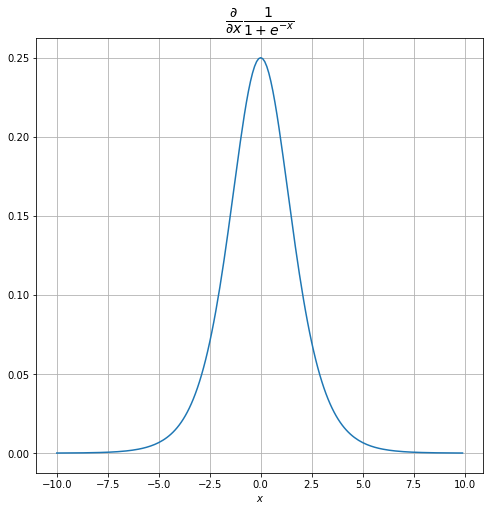

In [28]:
vals = np.arange(-10, 10, 0.1)
res = np.zeros_like(vals)
for i in range(len(vals)):
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    x = torch.tensor(vals[i]).float()
    x.requires_grad = True 
    y = 1 / (1 + torch.exp(-x))
    y.backward()
    res[i] = x.grad
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

fig, ax = plt.subplots()
ax.plot(vals, res);
ax.set_title('$\\frac{\\partial}{\\partial x}\\frac{1}{1+e^{-x}}$', fontsize=20)
ax.set_xlabel('$x$');

## Preparing the data

Repeat the preparation of the data in the same manner as in the last assignment, but this time **do not add the additional constant 1** to the features vector. 

✍️ Complete the code below to load the data, split it, and extract the PCA features.

Number of images in the dataset: 1560
Number of different persons in the dataset: 12
Each images size is: (62, 47)


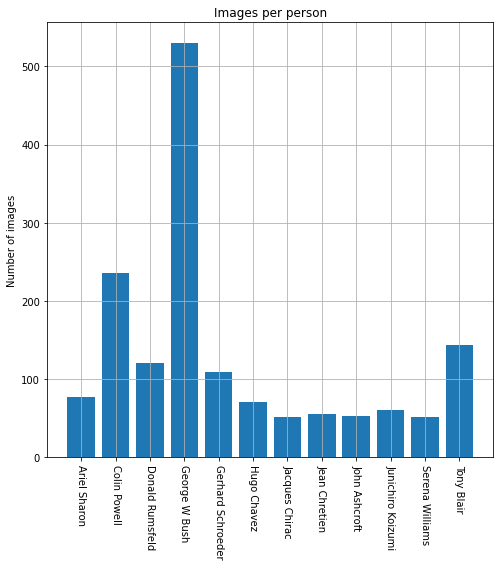

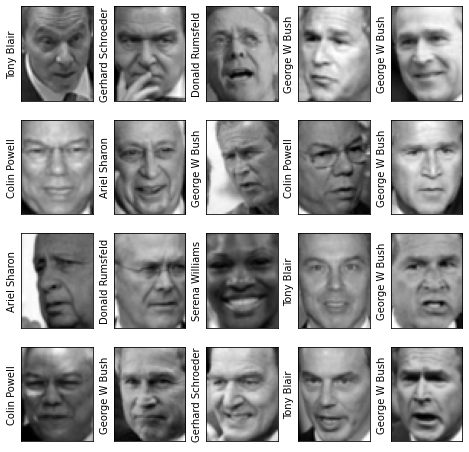

In [29]:
from sklearn.datasets import fetch_lfw_people

def load_lfw_dataset():
    """
    Loading the Labeled faces in the Wild dataset.
    Load only face of persons which appear at least 50 times in the dataset.

    Using:
    - N: The number of samples in the dataset.
    - H: the images' height
    - W: the images' width
    - K: The number of classes.
   
    Returns
    -------
    x: ndarray
        The N x H x W array of images.
    y: ndarray
        The 1D array of length N of labels.
    n_classes: int
        The number of different classes, K.
    label_to_name_mapping: list
        A list of K strings containing the name related to each label.
    image_shape: list
        The image's shape as the list: [H, W]
    
    """

    dataset = fetch_lfw_people(min_faces_per_person=50)

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    x = dataset.images
    y = dataset.target
    label_to_name_mapping = dataset.target_names
    image_shape = x[0].shape
    n_classes = y.max() + 1  ## The number of classes.
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return x, y, n_classes, label_to_name_mapping, image_shape

x, y, n_classes, label_to_name_mapping, image_shape = load_lfw_dataset()

print('Number of images in the dataset: {}'.format(len(x)))
print('Number of different persons in the dataset: {}'.format(n_classes))
print('Each images size is: {}'.format(image_shape))

_, images_per_class = np.unique(y, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label_to_name_mapping, images_per_class)
ax.set_xticklabels(label_to_name_mapping, rotation=-90);
ax.set_title('Images per person')
ax.set_ylabel('Number of images')

fig, ax_array = plt.subplots(4, 5)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x[i], cmap='gray')
    ax.set_ylabel(label_to_name_mapping[y[i]])
    ax.set_yticks([])
    ax.set_xticks([])

In [30]:
def split_dataset(x, y, train_fraction=0.6, validation_fraction=0.2):
    """
    Split the data

    Parameters
    ----------
    x: ndarray
        The N x H x W array of images.
    y: ndarray
        The 1D array of length N of labels.
    train_fraction: float
        The fraction of the dataset to use as the train set.
    validation_fraction: float
        The fraction of the dataset to use as the validation set.

    Returns
    -------
    n_samples_train: int
        The number of train samples.
    x_train: ndarray
        The n_samples_train x H x W array of train images.
    y_train: ndarray
        The 1D array of length n_samples_train of train labels.
    n_samples_val: int
        The number of validation samples.
    x_val: ndarray
        The n_samples_val x H x W array of validation images.
    y_val: ndarray
        The 1D array of length n_samples_val of validation labels.
    n_samples_test: int
        The number of test samples.
    x_test: ndarray
        The n_samples_test x H x W array of test images.
    y_test: ndarray
        The 1D array of length n_samples_test of test labels.
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    ## Create a random generator using a fixed seed
    rand_gen = np.random.RandomState(0)
    n_samples = len(x)
    indices = np.arange(0,n_samples)
    rand_gen.shuffle(indices)

    n_samples_train = int(n_samples * train_fraction)
    n_samples_val = int(n_samples * validation_fraction)
    n_samples_test = n_samples - (n_samples_train + n_samples_val)
    train_indices = indices[0:n_samples_train] ## Assign the first n_samples_train values of the indices array to train_indices
    val_indices = indices[n_samples_train:(n_samples_train + n_samples_val)]
    test_indices = indices[(n_samples_train + n_samples_val):] ## Assign the last n_samples_test values of the indices array to test_indices

    x_train = x[train_indices]
    x_val = x[val_indices]
    x_test = x[test_indices]

    y_train = y[train_indices]
    y_val = y[val_indices]
    y_test = y[test_indices]
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return n_samples_train, x_train, y_train, n_samples_val, x_val, y_val, n_samples_test, x_test, y_test

n_samples_train, x_train, y_train, n_samples_val, x_val, y_val, n_samples_test, x_test, y_test = split_dataset(x, y)

print('Number of training samples: {}'.format(n_samples_train))
print('Number of validation samples: {}'.format(n_samples_val))
print('Number of test samples: {}'.format(n_samples_test))

Number of training samples: 936
Number of validation samples: 312
Number of test samples: 312


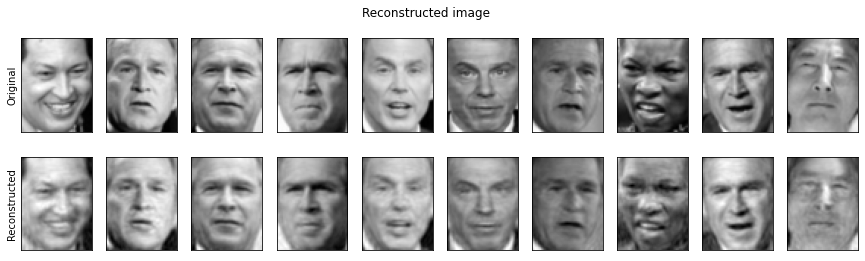

In [31]:
from sklearn.decomposition import PCA
def generate_pca_object(x_train, n_pca_components=300):
    """
    Generate a training sklearn.decomposition.PCA object.

    Using:
    - N: The number of samples in x_train.

    Parameters
    ----------
    x_train: ndarray
        The N x H x W array of train images.
    n_pca_components: int
        The number of PCA components to use.

    Returns
    -------
    pca: sklearn.decomposition.PCA 
        The trained sklearn.decomposition.PCA object which can perform the PCA decomposition and reconstruction
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    pca = PCA(n_pca_components)
    x_flat_train = x_train.reshape(len(x_train), -1) ## Reshape the training data to (n_smaples_train x 2914)
    pca.fit(x_flat_train)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return pca


def extract_features(x, pca):
    """
    Extract features from the images, which include the PCA elements and the constant 1.

    Using:
    - N: The number of samples in x.
    - D_PCA: The number of components.

    Parameters
    ----------
    x: ndarray
        The N x H x W array of images (x can be either the train, validation, or test dataset).
    pca: sklearn.decomposition.PCA 
        The trained sklearn.decomposition.PCA object which can perform the PCA decomposition and reconstruction

    Returns
    -------
    features: ndarray
        The N x (D_PCA + 1) array of features.
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    features = pca.transform(x.reshape(len(x), -1))
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
   
    return features

pca = generate_pca_object(x_train)
features_train = extract_features(x_train, pca)
features_val = extract_features(x_val, pca)
features_test = extract_features(x_test, pca)

## Ploting the reconstruction of the first 10 test images
reconstructed_images_flat = pca.inverse_transform(features_test)
reconstructed_images = reconstructed_images_flat.reshape(-1, *image_shape)
fig, ax_array = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    ax_array[0][i].imshow(x_test[i], cmap='gray')
    ax_array[0][i].set_yticks([])
    ax_array[0][i].set_xticks([])

    ax_array[1][i].imshow(reconstructed_images[i], cmap='gray')
    ax_array[1][i].set_yticks([])
    ax_array[1][i].set_xticks([])
ax_array[0][0].set_ylabel('Original')
ax_array[1][0].set_ylabel('Reconstructed')
fig.suptitle('Reconstructed image');

We will now convert all the data to tensors, transfer it to the GPU and to single precision:

In [0]:
x_train_gpu = torch.tensor(x_train).float().cuda()
features_train_gpu = torch.tensor(features_train).float().cuda()
y_train_gpu = torch.tensor(y_train).cuda()

x_val_gpu = torch.tensor(x_val).float().cuda()
features_val_gpu = torch.tensor(features_val).float().cuda()
y_val_gpu = torch.tensor(y_val).cuda()

x_test_gpu = torch.tensor(x_test).float().cuda()
features_test_gpu = torch.tensor(features_test).float().cuda()
y_test_gpu = torch.tensor(y_test).cuda()


## Logistic Regression

We will start by returning to the logistic regression model from last assignment.

**Reminder**: We are modeling the conditional distribution of the labels as:
$$
p\left(y|\boldsymbol{x};\Theta\right)=\sigma\left(\Theta\boldsymbol{x},y\right)
$$

And our objective is to minimize the log likelihood of this probability:

$$
\boldsymbol{\theta}^* = \underset{\boldsymbol{\theta}}{\arg\min}-\frac{1}{N}\sum_i\log\left(\sigma\left(\Theta\boldsymbol{x}_i,y_i\right)\right)
$$


Where $\sigma$ is the softmax function:

$$
\sigma\left(\boldsymbol{q},k\right)=\frac{e^{q_k}}{\sum_{k'} e^{q_{k'}}}
$$

✍️ Complete the code below to define the same objective function we defined last time:
$$
g\left(\Theta;X,\boldsymbol{y}\right)=-\frac{1}{N}\sum_i\log\left(\sigma\left(\Theta\boldsymbol{x}_i,y_i\right)\right)
$$
This time, implement the function by using the two following function from torch:

- [**torch.nn.functional.log_softmax**](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.log_softmax): which calculates the log of the softmax function. This function is similar to the softmax function which you have implemented in the last assignment with the addition of taking the log of the result.
- [**torch.nn.functional.nll_loss**](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.nll_loss): Which calculates the negative log-likelihood of a matrix of log-probabilities, $P$, and a vector of labels, $\boldsymbol{y}$: $-\frac{1}{N}\sum_iP_{i,y_i}$

In [33]:
## Define the objective function
def g(theta, x, y):
    """
    The objective function.

    Using:
    - N: The number of samples.
    - D: The number of features (n_pca_componens + 1).
    - K: The number of classes.

    Parameters
    ----------
    theta: ndarray
        The K x D parameters matrix.
    x: ndarray
        The N x D features matrix.
    y: ndarray
        The 1D array of length N of labels.

    Returns
    -------
    res: float
        The objective function evaluated at the given theta.
    """

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    q = torch.matmul(x, theta.t())
    log_sigma = torch.nn.functional.log_softmax(q, dim=1)
    res = torch.nn.functional.nll_loss(log_sigma, y)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

    return res

## Testing the function
test_theta = torch.tensor([[1, -3, 2], [-2, 1, -1]]).float().cuda()
test_x = torch.tensor([[0.1, 0.7, -0.2], [0.5, -0.2, 0.5]]).float().cuda()
test_y = torch.tensor([1, 0]).cuda()
print(float(g(test_theta, test_x, test_y)))

0.0330941379070282


Make sure the result you get is: $0.033094\ldots$

### Doing it the PyTorch way - Using Torch.nn.Sequential and  a Loss Function

An alternative way to define the model function, is by using the **[torch.nn.Sequential](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential)** operator. The Senquential operator allows us to define a model by stacking together a chain of operators. This method is usefull when stacking layers of a neural-network model, as we will see later.

In addition to the model, we need to also define our loss function between the output of the model and the labels. PyTorch offers a large variety of [such loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions).

In the case of logistic regression, the model is simply a linear (fully connected) layer followed by a softmax operation. The loss function in our case is the minus log-likelihood function. Therefore, we can calculate the model in the following way:

In [34]:
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=3, out_features=2, bias=False),
    torch.nn.LogSoftmax(dim=1),
    ).cuda()

loss_func = torch.nn.NLLLoss()

## Testing the function
model[0].weight[:] = torch.tensor([[1, -3, 2], [-2, 1, -1]]).float().cuda()
test_x = torch.tensor([[0.1, 0.7, -0.2], [0.5, -0.2, 0.5]]).float().cuda()
test_y = torch.tensor([1, 0]).cuda()

log_prob = model(test_x)
loss = loss_func(log_prob, test_y)

print(float(loss))

0.0330941379070282


In the above code, we used have used the torch.nn.Sequential to stack together a [**torch.nn.Linear**](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) layer and a [**torch.nn.LogSoftmax**](https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax) layer. 

The linear layer is defined by the number of **input_features**, the number of **output_features** and a flag for optionally added a bias term.

The log-softmax layer is defined by the dimension in which the softmax is calculated.

Notice that we have used here  [**torch.nn.LogSoftmax**](https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax) to define an operator (rather then  [**torch.nn.functional.log_softmax**](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.log_softmax) which is a function)

In addition, notice that we have used the **.cuda** function to copy all the model parameters to the GPU.

The parameters of each operator are automatically defined for each operator (which in this case, is the matrix $\Theta$ of the linear layer). They are stored as part of the model inside each of the operators.

## The Gradient Decent Algorithm

We will use the following function for running the gradient descent algorithm with an L2 regularization.

A few points which are worth mentioning regarding the code:
1. It uses the built-in optimization object [**torch.optim.SGD**](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) for performing the gradient step.
2. We are using the weight decay option of torch.optim.SGD which is equivalet to adding an L2 regularization to the objective.

In [0]:
def train_model(model, alpha, n_iters, x_train, y_train, x_val, y_val, llambda):
    ## Initialize lists to store intermidiate results for plotting
    objective_list_train = []
    objective_list_val = []
    
    ## Defining the loss function
    loss_func = torch.nn.NLLLoss()
    
    ## Defein Optimizer
    optimizer = torch.optim.SGD(params=model.parameters(), lr=alpha, weight_decay=2 * llambda)
    
    ## Perforing the update steps
    for i_iter in tqdm.tqdm_notebook(range(n_iters)):
        ## reseting all previous gradients
        optimizer.zero_grad()
        
        ## Forward path
        log_prob = model(x_train)
        log_prob = log_prob.view(log_prob.shape[0], log_prob.shape[1]) ## This is for later support for the CNNs
        loss = loss_func(log_prob, y_train)
        
        ## Backward path
        loss.backward()
        
        ## Optimization step
        optimizer.step()

        ## Store intermidiate results
        objective_list_train.append(float(loss))
        with torch.no_grad(): ## This line is important and it tells PyTorch nit to calculate gradiants in this section 
            log_prob = model(x_val)
            log_prob = log_prob.view(log_prob.shape[0], log_prob.shape[1])  ## This is for later support for the CNNs
            loss = loss_func(log_prob, y_val)
            objective_list_val.append(float(loss))
    
    objectives_array_train = np.array(objective_list_train)
    objectives_array_val = np.array(objective_list_val)
    
    return objectives_array_train, objectives_array_val

### Training
✍️ Complete the code below to define the logistig regression model and used the above function to train it:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]



The empirical risk (amount of misclassifications) on the test set is: 0.17307692766189575


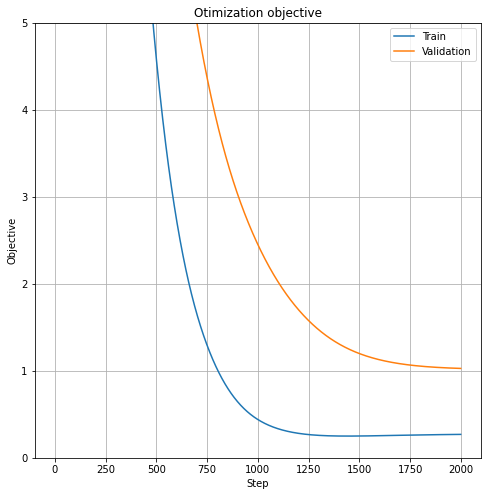

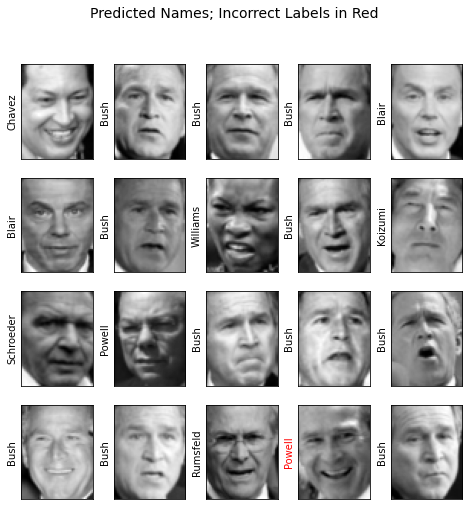

In [36]:
n_features = features_train_gpu.shape[1]

## The logistic regression model
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=n_features, out_features=n_classes, bias=False),
    torch.nn.LogSoftmax(dim=1),
    ).cuda()
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## To save you time, some optimal hyper-parameters were pre-selected. 
alpha = 1e-5  ## Learning rate parameter
llambda = 100  ## L2 regularization parameter
n_iters = 2000
objectives_array_train, objectives_array_val = train_model(model, alpha, n_iters, 
                                                           features_train_gpu, y_train_gpu, 
                                                           features_val_gpu, y_val_gpu,
                                                           llambda)

## Plot the objective
## ==================
fig, ax = plt.subplots()
ax.plot(objectives_array_train, label='Train')
ax.plot(objectives_array_val, label='Validation')
ax.set_title('Otimization objective')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, 5)
ax.legend();

with torch.no_grad():
    y_hat_test = model(features_test_gpu).argmax(dim=1)

empirical_risk_test = (y_hat_test != y_test_gpu).float().mean()

print('The empirical risk (amount of misclassifications) on the test set is: {}'.format(empirical_risk_test))

## Plot estimation
## ===============
fig, ax_array = plt.subplots(4, 5)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel(label_to_name_mapping[y_hat_test[i]].split()[-1],
                   color='black' if y_hat_test[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);    

## MLP

Now that we have a training function and we know how to define models using PyTorch, we can start playing around with some neural-networks architectures. 

Specifically, we will run one MLP network and one CNN network.

✍️ Complete the code below to define an MLP with 1 hidden layer of 1024 neurons and a ReLU activation function.

I.e., build a network which with of the following layers:

1. A fully connected (linear) layer with an input of the n_features and output of 1024.
2. A ReLU layer
3. A fully connected (linear) layer with an input of 1024 and output of n_classes.
4. A log-softmax function.

- Use [**torch.nn.ReLU**(https://pytorch.org/docs/stable/nn.html#torch.nn.ReLU)] to define the ReLU layer.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]



The empirical risk (amount of misclassifications) on the test set is: 0.15705128014087677


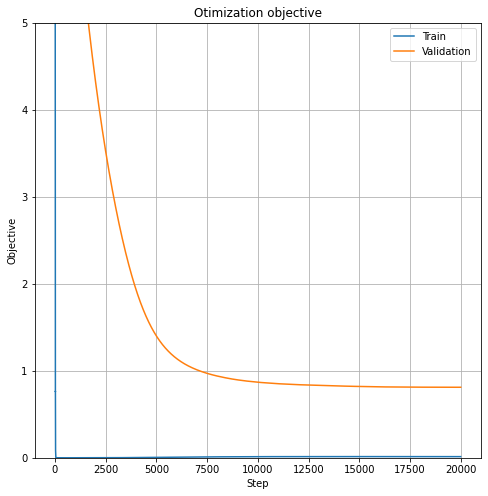

In [37]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=n_features,out_features=1024,bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=1024,out_features=n_classes,bias=False),
    torch.nn.LogSoftmax(dim=1),
    ).cuda()
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## We will use the following 
alpha = 1e-3
llambda = 0.1
n_iters = 20000
objectives_array_train, objectives_array_val = train_model(model, alpha, n_iters, 
                                                           features_train_gpu, y_train_gpu, 
                                                           features_val_gpu, y_val_gpu,
                                                           llambda)


## Plot the objective
## ==================
fig, ax = plt.subplots()
ax.plot(objectives_array_train, label='Train')
ax.plot(objectives_array_val, label='Validation')
ax.set_title('Otimization objective')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, 5)
ax.legend();

with torch.no_grad():
    y_hat_test = model(features_test_gpu).argmax(dim=1)

empirical_risk_test = (y_hat_test != y_test_gpu).float().mean()

print('The empirical risk (amount of misclassifications) on the test set is: {}'.format(empirical_risk_test))

Make sure you get a test risk of about 16%.

## CNN

As opposed to using the PCA features as an input to our mode,l we can use the raw images directly, but for that, we will need a different architecture.

✍️ Complete the code below to define a CNN which is composed of the following layers:

1. A convolutional layer with a 4x4 kernel, 64 output channels, a stride of 2, and a padding of 2 on the vertical direction and 4 on the horizontal direction.
2. A ReLU layer.
3. A convolutional layer with a 4x4 kernel, 128 output channels, a stride of 2, and a padding of 1 in each direction.
4. A ReLU layer.
5. A convolutional layer with a 4x4 kernel, 256 output channels, a stride of 2, and a padding of 1 in each direction.
6. A ReLU layer.
7. A convolutional layer with a 4x4 kernel, 512 output channels, a stride of 2, and a padding of 1 in each direction.
8. A ReLU layer.
9. A convolutional layer (which is also a fully connected layer) with a 4x3 kernel and n_classes output channels (with no padding)
10. A log-softmax layer.

- The learning rate, which was pre-selected for training the network, is a bit too high for the task and was chosen to produce reasonable results in reasonable time. Training the network with the given number of iteration should take about 5 minutes. 
- This architecture is very far from being optimal and was built to be simple, and with a reasonable training time.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]



The empirical risk (amount of misclassifications) on the test set is: 0.14743590354919434


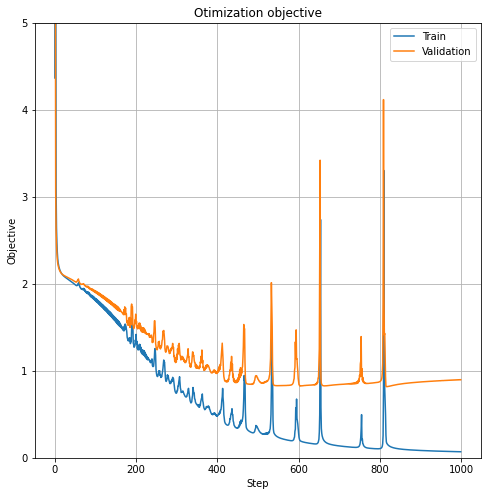

In [38]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=4, stride=2, padding=(2, 4) ),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=(1, 1) ),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=2, padding=(1, 1) ),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=(1, 1)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=512, out_channels=n_classes, kernel_size=(4,3)),
    torch.nn.LogSoftmax(dim=1)
    ).cuda()
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

alpha = 1e-3
llambda = 0.1
n_iters = 1000
objectives_array_train, objectives_array_val = train_model(model, alpha, n_iters, 
                                                           x_train_gpu[:, None, :, :], y_train_gpu, 
                                                           x_val_gpu[:, None, :, :], y_val_gpu,
                                                           llambda)


## Plot the objective
## ==================
fig, ax = plt.subplots()
ax.plot(objectives_array_train, label='Train')
ax.plot(objectives_array_val, label='Validation')
ax.set_title('Otimization objective')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, 5)
ax.legend();

with torch.no_grad():
    y_hat_test = model(x_test_gpu[:, None, :, :]).argmax(dim=1)[:, 0, 0]

empirical_risk_test = (y_hat_test != y_test_gpu).float().mean()

print('The empirical risk (amount of misclassifications) on the test set is: {}'.format(empirical_risk_test))

## Reminder: Submission

To submit your code, download it as a **ipynb** file from Colab, and upload it to the course's website. You can download this code by selecting **Download .ipynb** from the **file** menu.